The problem of graph clustering for social network graphs like `page-page` naturally moulds into community detection. There are a number of community detection algorithms. We'll test the [Girvan Newman's Algorithm](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm). More algorithmic details in the [research paper](https://www.pnas.org/content/99/12/7821).

Note: This notebook continues from `visual.ipynb`

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
target = pd.read_csv('../facebook_large/musae_facebook_target.csv')
edges  = pd.read_csv('../facebook_large/musae_facebook_edges.csv')

In [4]:
G = nx.Graph()
for it, cat in zip(target['id'], target['page_type']):
    G.add_node(it, page_type=cat)
for n1, n2 in zip(edges['id_1'], edges['id_2']):
    G.add_edge(n1, n2)

In [7]:
# sanity check
G.number_of_nodes(), G.number_of_edges()

(22470, 171002)

In [23]:
# returns the edge with the maximum edge-betweenness-centrality measure
def max_ebc_edge(graph):
    ebc = nx.edge_betweenness_centrality(graph)
    return max(ebc, key=lambda z: ebc[z])

In [34]:
# the girvan-newman algorithm
def girvan_newman(graph):
    cc, cnt = nx.connected_components(graph), nx.number_connected_components(graph)
    num_comm: int = 1
    # while the number of communities isn't created
    while(cnt <= num_comm):
        # remove the edge with the maximum EBC
        graph.remove_edge(*max_ebc_edge(graph))
        # update cc and cnt
        cc, cnt = nx.connected_components(graph), nx.number_connected_components(graph)
    return cc

In [77]:
# testing the algorithm on a much simpler graph first
# this is a sample graph inbuilt in NetworkX 
F = nx.davis_southern_women_graph()
max_ebc_edge(F)

('Evelyn Jefferson', 'E9')

In [74]:
# communities in the graph
c = girvan_newman(F.copy())
# nodes forming these communities
c_nodes = [list(i) for i in c]

In [75]:
for n in c_nodes:
    print(n.__len__())

18
14


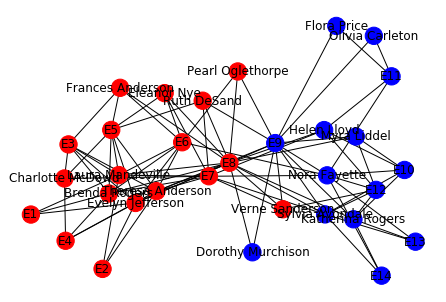

In [76]:
# plot the communities
colors = ['red', 'blue']
color_map = [colors[0] if n in c_nodes[0] else colors[1] 
             for n in F]
nx.draw(F, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
# Finally, testing the algorithm on our original graph
gcc = girvan_newman(G.copy())